# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from matplotlib import style
style.use('dark_background')
import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
state_dict = {9.0: 'CT', 34.0: 'NJ', 36.0: 'NY'}
df['_STATE'] = df['_STATE'].replace(state_dict)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,CT,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,CT,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,CT,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,CT,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,CT,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

Now check to see how large our subset df.

In [6]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook (a.k.a. data dictionary), we want to start there before looking at the code.

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
#your code here
zero_dict = {88:0,
            77:np.nan,
            99:np.nan}
df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [9]:
df.shape

(34545, 358)

In [10]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [11]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up, let's calculate the descriptive statistics. Generate a graph that quickly shows those statistics, and then generate a graph that shows the distribution of the data.

In [12]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

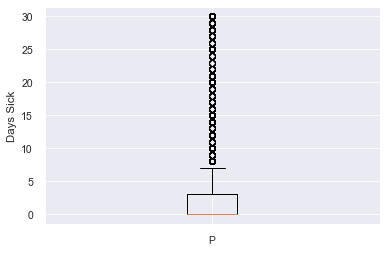

In [15]:
fig, ax = plt.subplots()
ax.boxplot(df['PHYSHLTH'])
ax.set_xticklabels('PHYSHLTH')
ax.set_ylabel("Days Sick")
plt.show()

Text(0.5, 1.0, "Distribution of People's Sick Days")

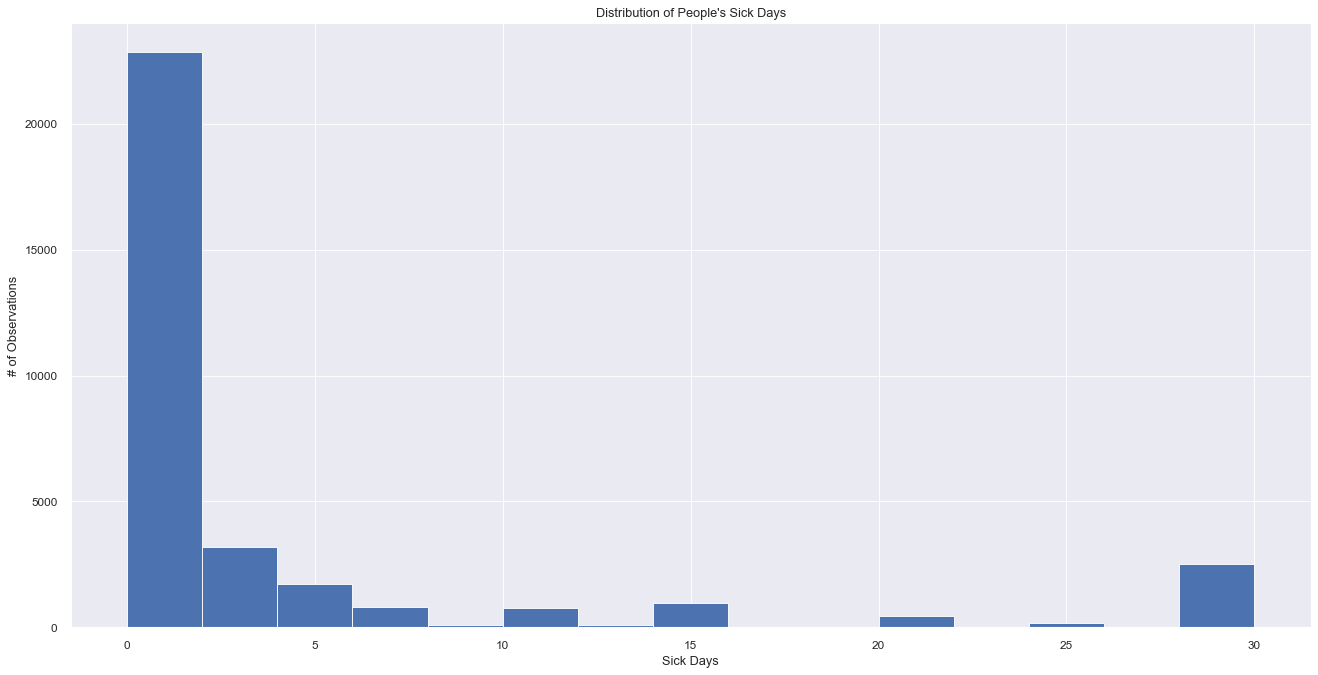

In [17]:
# graphic the distribution of data
plt.figure(figsize=(20, 10), dpi= 80)
plt.hist(df['PHYSHLTH'],bins=15)
plt.xlabel('Sick Days')
plt.ylabel('# of Observations')
plt.title("Distribution of People's Sick Days")

Text(0.5, 1.0, "Distribution of People's Sick Days")

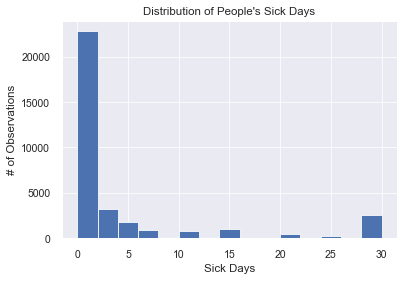

In [20]:
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'],bins=15)
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of Observations')
ax.set_title("Distribution of People's Sick Days")

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [21]:
# code to calculate the average number of sick days by state
avg_sick_by_state = df.groupby('_STATE')['PHYSHLTH'].mean()
avg_sick_by_state

_STATE
CT    3.688562
NJ    4.380957
NY    4.148030
Name: PHYSHLTH, dtype: float64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

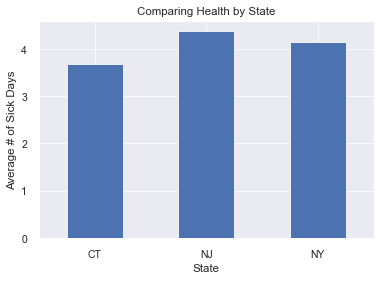

In [18]:
# code to graph those averages using matplotlib
# plt.bar([avg_sick_by_state.groups.keys()], [avg_sick_by_state.groups.values()])
avg_sick_by_state.plot.bar()
plt.title('Comparing Health by State')
plt.xlabel('State')
plt.ylabel('Average # of Sick Days')
plt.xticks(rotation='horizontal')

In [19]:
df.groupby(['_STATE','PHYSHLTH'])['PHYSHLTH'].count()

_STATE  PHYSHLTH
CT      0.0         6779
        1.0          496
        2.0          627
        3.0          319
        4.0          185
                    ... 
NY      26.0           3
        27.0           9
        28.0          20
        29.0          13
        30.0         834
Name: PHYSHLTH, Length: 92, dtype: int64

In [20]:
ct_dist_sick = df[df['_STATE'] == 'CT']['PHYSHLTH']
ct_dist_sick
nj_dist_sick = df[df['_STATE'] == 'NJ']['PHYSHLTH']
nj_dist_sick
ny_dist_sick = df[df['_STATE'] == 'NY']['PHYSHLTH']
ny_dist_sick

291530     3.0
291531    24.0
291532     0.0
291533     7.0
291534     0.0
          ... 
303774     0.0
303775     0.0
303776     6.0
303777     0.0
303778     0.0
Name: PHYSHLTH, Length: 11876, dtype: float64

_STATE
CT    AxesSubplot(0.125,0.125;0.775x0.755)
NJ    AxesSubplot(0.125,0.125;0.775x0.755)
NY    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PHYSHLTH, dtype: object

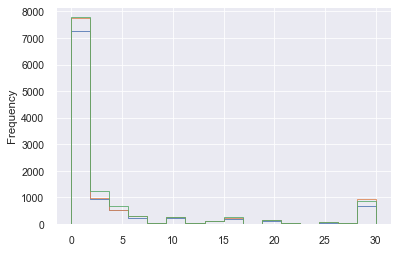

In [21]:
df.groupby('_STATE')['PHYSHLTH'].plot(kind='hist', histtype='step', bins=16)

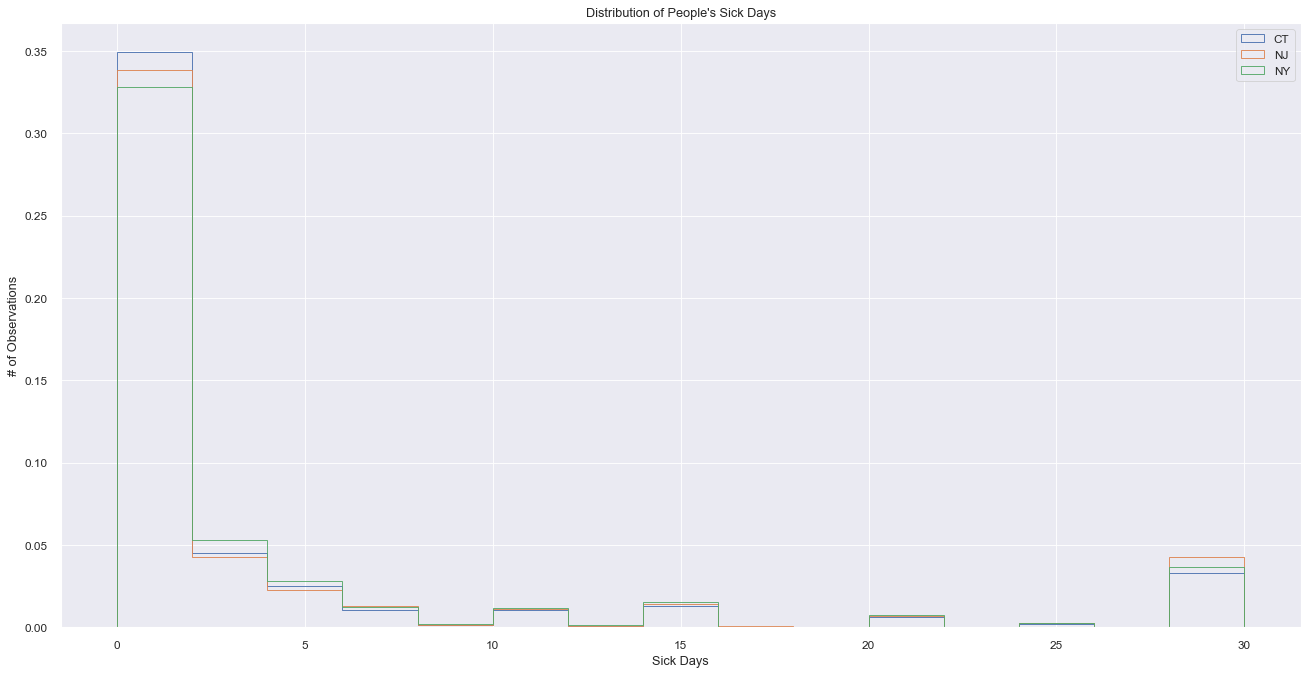

In [22]:
plt.figure(figsize=(20, 10), dpi= 80)
bins=15
plt.hist(ct_dist_sick, bins, histtype='step', label='CT', density=True)
plt.hist(nj_dist_sick, bins, histtype='step', label='NJ', density=True)
plt.hist(ny_dist_sick, bins, histtype='step', label='NY', density=True)
plt.title("Distribution of People's Sick Days")
plt.xlabel('Sick Days')
plt.ylabel('# of Observations')
plt.legend(loc=1)

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [23]:
# code to create new colum for chronically sick
# use np.where > 10
df['is_chronic'] = np.where(df['PHYSHLTH'].values > 10, 1, 0)
df['is_chronic'].head(20)
df[df['PHYSHLTH'] >= 10][['PHYSHLTH','is_chronic']].head(10)

,PHYSHLTH,is_chronic
49946,28.0,1
49955,30.0,1
49982,15.0,1
49993,29.0,1
49995,30.0,1
50000,10.0,0
50003,10.0,0
50009,14.0,1
50016,15.0,1
50039,30.0,1


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [24]:
# code to calculate averages per state
avg_chronic_by_state = df.groupby('_STATE')['is_chronic'].mean()
avg_chronic_by_state

_STATE
CT    0.114760
NJ    0.139291
NY    0.129252
Name: is_chronic, dtype: float64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

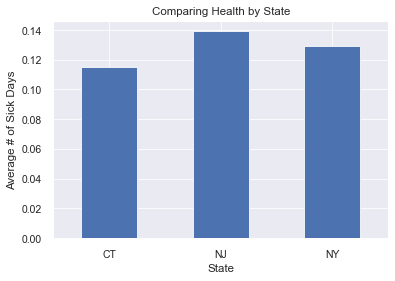

In [25]:
# create graphic to compare chronically sick by state
avg_chronic_by_state.plot.bar()
plt.title('Comparing Health by State')
plt.xlabel('State')
plt.ylabel('Average # of Sick Days')
plt.xticks(rotation='horizontal')

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [26]:
df_smoke = df[['_STATE','PHYSHLTH','SMOKE100','SMOKDAY2']]
df_smoke.head()

,_STATE,PHYSHLTH,SMOKE100,SMOKDAY2
49938,CT,0.0,2.0,NaN
49939,CT,0.0,2.0,NaN
49940,CT,2.0,2.0,NaN
49941,CT,0.0,2.0,NaN
49942,CT,0.0,1.0,3.0


In [27]:
df_smoke['SMOKE100'].value_counts(dropna=False)

2.0    18685
1.0    13480
NaN     1376
7.0      161
9.0       45
Name: SMOKE100, dtype: int64

In [28]:
df_smoke['SMOKDAY2'].value_counts(dropna=False)

NaN    20279
3.0     9494
1.0     2611
2.0     1336
9.0       21
7.0        6
Name: SMOKDAY2, dtype: int64

In [29]:
conditions = [
    ((df_smoke['SMOKE100'] == 1.0) & (df_smoke['SMOKDAY2'] == 1.0)),
    ((df_smoke['SMOKE100'] == 1.0) & (df_smoke['SMOKDAY2'] == 2.0)),
    ((df_smoke['SMOKE100'] == 1.0) & (df_smoke['SMOKDAY2'] == 3.0)),
    df_smoke['SMOKE100'] == 2.0,
]

choices = [
    "Everyday",
    "Some Days",
    "Former",
    "Nonsmoker",
]

df_smoke['is_smoker'] = np.select(conditions, choices, default="Unknown")

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,_STATE,PHYSHLTH,SMOKE100,SMOKDAY2,is_smoker
49976,CT,0.0,NaN,NaN,Unknown
50026,CT,7.0,7.0,NaN,Unknown
50040,CT,0.0,NaN,NaN,Unknown
50062,CT,2.0,NaN,NaN,Unknown
50084,CT,0.0,NaN,NaN,Unknown
...,...,...,...,...,...
303600,NY,15.0,NaN,NaN,Unknown
303625,NY,0.0,NaN,NaN,Unknown
303638,NY,2.0,NaN,NaN,Unknown
303643,NY,0.0,NaN,NaN,Unknown


In [31]:
df_smoke['is_smoker'].value_counts(dropna=False)
df_smoke[df_smoke['is_smoker'] == 'Unknown']

,_STATE,PHYSHLTH,SMOKE100,SMOKDAY2,is_smoker
49976,CT,0.0,NaN,NaN,Unknown
50026,CT,7.0,7.0,NaN,Unknown
50040,CT,0.0,NaN,NaN,Unknown
50062,CT,2.0,NaN,NaN,Unknown
50084,CT,0.0,NaN,NaN,Unknown
...,...,...,...,...,...
303600,NY,15.0,NaN,NaN,Unknown
303625,NY,0.0,NaN,NaN,Unknown
303638,NY,2.0,NaN,NaN,Unknown
303643,NY,0.0,NaN,NaN,Unknown


In [32]:
# your code here
# np.where(smoke100 == x, pass along value for smoke 100,
# if not pass along value for smoke day 2)
total = df_smoke['is_smoker'].count()
df_smoke_counts = df_smoke['is_smoker'].value_counts()
df_smoke_counts
df_smoke_pct = df_smoke_counts.groupby(level=0).apply(lambda x: x / total)
df_smoke_pct

Nonsmoker    0.553679
Former       0.281329
Everyday     0.077370
Unknown      0.048034
Some Days    0.039589
Name: is_smoker, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

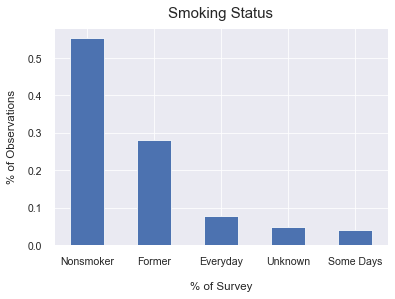

In [41]:
# code to graph those proportion of differen smoking groups using matplotlib
df_smoke_pct.plot.bar()
plt.title('Smoking Status',pad=10.0, fontsize=15.0)
plt.xlabel('% of Survey', labelpad=15.0)
plt.ylabel('% of Observations', labelpad=10.0)
plt.xticks(rotation='horizontal')

In [36]:
# your code here
# np.where(smoke100 == x, pass along value for smoke 100,
# if not pass along value for smoke day 2)
total2 = df_smoke.groupby('_STATE')['is_smoker'].count()
df_smoke_by_state_counts = df_smoke.groupby('_STATE')['is_smoker'].value_counts()
df_smoke_by_state_pct = df_smoke_by_state_counts.groupby(level=0).apply(lambda x: (x / total2) * 100)
df_smoke_by_state_pct

_STATE  is_smoker
CT      Nonsmoker    54.777682
        Former       30.404302
        Everyday      6.779987
        Unknown       4.734467
        Some Days     3.303563
NJ      Nonsmoker    55.384884
        Former       28.355734
        Everyday      7.863501
        Unknown       4.206668
        Some Days     4.189213
NY      Nonsmoker    55.868979
        Former       25.926238
        Everyday      8.454025
        Unknown       5.439542
        Some Days     4.311216
Name: is_smoker, dtype: float64

Text(0, 0.5, '% of observations')

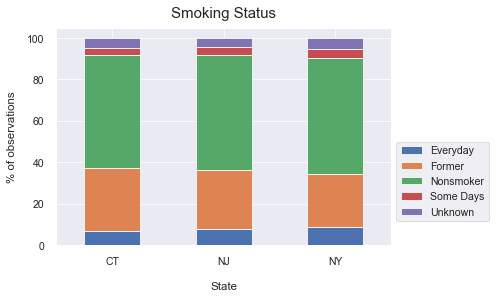

In [40]:
#graph showing the breakdown of smokers per state
df_smoke_by_state_pct2 = df_smoke_by_state_pct.reindex()
df_smoke_by_state_pct.unstack().plot(kind='bar', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='horizontal')
plt.title('Smoking Status', fontsize=15, pad=10)
plt.xlabel('State', labelpad=15)
plt.ylabel('% of observations', labelpad=10)

In [42]:
avg_sick_by_smoke = df_smoke.groupby('is_smoker')['PHYSHLTH'].mean()
avg_sick_by_smoke

is_smoker
Everyday     6.653007
Former       4.581841
Nonsmoker    3.349104
Some Days    6.295659
Unknown      3.706354
Name: PHYSHLTH, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

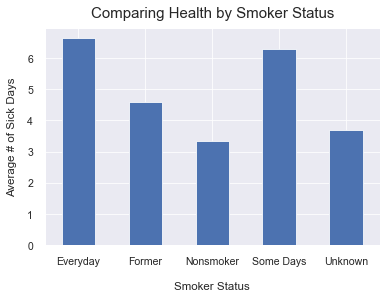

In [43]:
# code to graph these averages sick days for each category of smoking status
avg_sick_by_smoke.plot.bar()
plt.title('Comparing Health by Smoker Status', pad=10.0, fontsize=15.0)
plt.xlabel('Smoker Status', labelpad=15.0)
plt.ylabel('Average # of Sick Days', labelpad=10.0)
plt.xticks(rotation='horizontal')

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [44]:
# code here to clean up the ALCDAY5 responses
df_alco = df[['_STATE','PHYSHLTH','ALCDAY5']]
df_alco.head()

,_STATE,PHYSHLTH,ALCDAY5
49938,CT,0.0,101.0
49939,CT,0.0,230.0
49940,CT,2.0,888.0
49941,CT,0.0,103.0
49942,CT,0.0,101.0


In [45]:
df_alco['ALCDAY5'].unique()

array([101., 230., 888., 103., 104., 204., 205., 107., 215., 202., 201.,
       220., 203., 214., 207., 102., 210.,  nan, 208., 105., 229., 227.,
       226., 216., 206., 222., 999., 777., 225., 228., 213., 212., 224.,
       106., 218., 217., 221., 211., 209., 219., 223.])

In [46]:
df_alco['ALCDAY5'].shape

(33747,)

In [47]:
#descriptive statistics of cleaned data
df_alco['ALCDAY5'].describe()

count    31922.000000
mean       468.457177
std        350.129601
min        101.000000
25%        201.000000
50%        212.000000
75%        888.000000
max        999.000000
Name: ALCDAY5, dtype: float64

In [48]:
df_alco['ALCDAY5'].value_counts()

888.0    12631
201.0     2968
202.0     2300
101.0     1565
203.0     1323
102.0     1217
230.0     1148
205.0     1147
204.0     1132
210.0      834
103.0      773
107.0      697
220.0      641
215.0      585
206.0      385
104.0      380
208.0      363
105.0      346
207.0      276
225.0      263
777.0      209
999.0      181
212.0      142
106.0      109
228.0       56
214.0       51
229.0       31
209.0       26
227.0       24
218.0       18
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [49]:
conditions = [
    df_alco['ALCDAY5'] < 108,
    ((df_alco['ALCDAY5'] > 200) & (df_alco['ALCDAY5'] < 231)),
    df_alco['ALCDAY5'] == 888
]

choices = [
    (df_alco['ALCDAY5'] - 100) * (30/7),
    (df_alco['ALCDAY5'] - 200),
    0
]

df_alco['drink_days_per_30'] = np.select(conditions, choices, default=np.nan)
df_alco['drink_days_per_30'].value_counts(dropna=False)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0.000000     12631
1.000000      2968
2.000000      2300
NaN           2215
30.000000     1845
4.285714      1565
3.000000      1323
8.571429      1217
5.000000      1147
4.000000      1132
10.000000      834
12.857143      773
20.000000      641
15.000000      585
6.000000       385
17.142857      380
8.000000       363
21.428571      346
7.000000       276
25.000000      263
12.000000      142
25.714286      109
28.000000       56
14.000000       51
29.000000       31
9.000000        26
27.000000       24
18.000000       18
16.000000       15
26.000000       15
24.000000       14
22.000000       13
21.000000       13
13.000000       11
11.000000       10
17.000000        7
23.000000        2
19.000000        1
Name: drink_days_per_30, dtype: int64

In [50]:
df_alco.dropna(subset=['drink_days_per_30'], inplace=True)
df_alco['drink_days_per_30'].describe()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    31532.000000
mean         5.475947
std          8.404583
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: drink_days_per_30, dtype: float64

In [51]:
df_alco['drink_days_per_30'].shape

(31532,)

Text(0.5, 1.0, "Distribution of People's Sick Days")

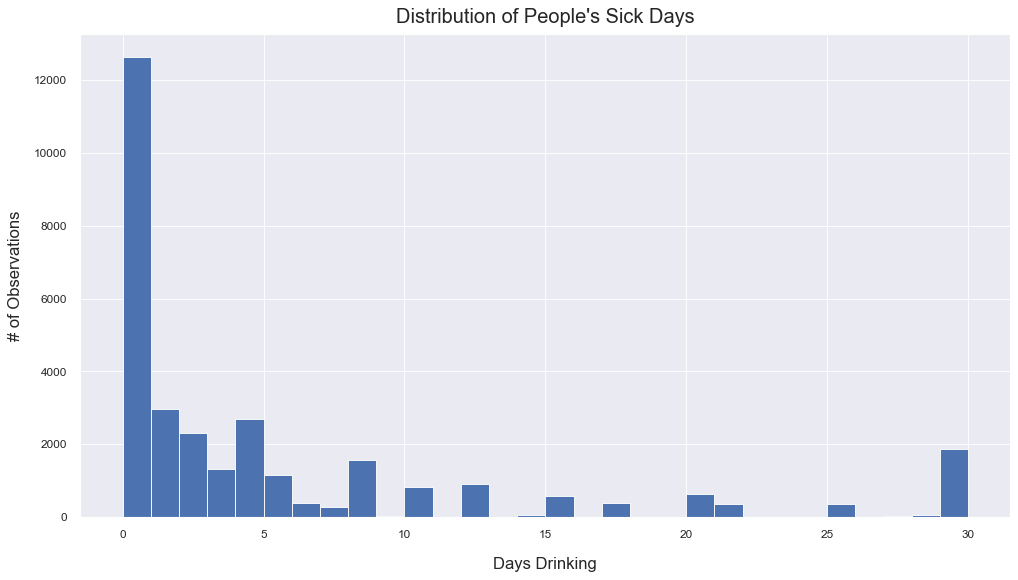

In [58]:
# graphic showing the histogram of data
plt.figure(figsize=(15, 8), dpi= 80)
plt.hist(df_alco['drink_days_per_30'],bins=30)
plt.xlabel('Days Drinking', labelpad=15, fontsize=15)
plt.ylabel('# of Observations', labelpad=10, fontsize=15)
plt.title("Distribution of People's Sick Days", pad=10, fontsize=18)

In [59]:
# code to calculate averages per state
df_alco.groupby('_STATE')['drink_days_per_30'].mean()

_STATE
CT    6.178850
NJ    5.041433
NY    5.280356
Name: drink_days_per_30, dtype: float64

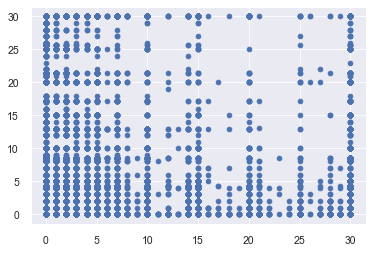

In [60]:
plt.scatter(df_alco['PHYSHLTH'], df_alco['drink_days_per_30'])
# plt.xlabel('Days Drinking')
# plt.ylabel('# of Observations')
# plt.title("Distribution of People's Sick Days")

In [61]:
df_alco['PHYSHLTH'].mean()
df_alco['drink_days_per_30'].mean()
sick_days_alco_corr = df_alco['PHYSHLTH'].corr(df_alco['drink_days_per_30'])

In [62]:
# Code to calculate correlation of between number of drinks of number of days physically ill
sick_days_alco_corr

-0.0909342888755792

In [63]:
df_alco[df_alco['ALCDAY5'] < 101]

,_STATE,PHYSHLTH,ALCDAY5,drink_days_per_30


## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [64]:
from scipy import stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [65]:
mean_confidence_interval(df['PHYSHLTH'])

(4.085340919192817, 3.9945079218863824, 4.176173916499252)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [66]:
mean_confidence_interval(df['is_chronic'])

(0.1281891723708774, 0.12462228564122874, 0.13175605910052607)

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.